
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
- The dataset includes the entries made for each patient on their appointment day.
- A number of characteristics about the patient are included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
-  ‘Neighborhood’ indicates the location of the hospital.
-  ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
-  No-show is the last column of the dataset: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Questions of analysis
- What factors are important for us to consider in order to predict if a patient will show up for their scheduled appointment?
- Does the proximity of the Neighbourhood to the Residential Place of the Patient determines if a patient will show up for appointment or not?
- What is the relationship between other features and the NoShow features?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Data Wrangling


### General Properties

In [3]:
df = pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#this is used to check the number of rows and columns present in the dataset
df.shape

(110527, 14)

In [7]:
#this is used to check the datatype of each feature present and also to check if there are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#this is used to check if there are duplicated entry in the dataset but there are none based on our output
print(sum(df.duplicated()))

0


In [10]:
#this is used to check if there are no empty rows or columns in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- There are no missing values in the dataset

In [9]:
#this is used to check the names of columns and to see if there are no errors in the spelling of the column names
#and a few spelling errors were noticed.
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

## DATA CLEANING -  Observations in the data
- There are few typographical error in some of the features which will be corrected
- The PatientId is in float as opposed to be in int
- The ScheduledDay and the AppointmentDay Features are in the object type so they both need to be converted to datetime
- It also looks like the AppointmentDay will work better than the ScheduledDay, because it is the date that the client showed up for their appointment.
- There no missing values from the dataset

In [11]:
#this is used to rename incorrectly spelt columns
df = df.rename(columns = {'No-show': 'NoShow', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'SMSReceived'})

In [12]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]' because this datatype works better for time
import datetime
from time import  strftime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [13]:
#this is line of code is used to recheck if the misspelt column has been changed
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

- From the above info, there are 14 columns in total in the dataset where 13 features are independent variable while Noshow is the dependent variable
- Independent variables => PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMSReceived
- Dependent Variables => NoShow

In [14]:
#to check for the unique values present in some of the features of the dataset
print("The unique values in the Gender Feature are ", df.Gender.unique())
print("The unique values in the Scholarship Feature are ", df.Scholarship.unique())
print("The unique values in the Hypertension Feature are ", df.Hypertension.unique())
print("The unique values in the Diabetes Feature are ", df.Diabetes.unique())
print("The unique values in the Alcoholism Feature are ", df.Alcoholism.unique())
print("The unique values in the SMS_Received Feature are ", df.SMSReceived.unique())
print("The unique values in the Handicap Feature are ", df.Handicap.unique())
print("The unique values in the Noshow Feature are ", df.NoShow.unique())

The unique values in the Gender Feature are  ['F' 'M']
The unique values in the Scholarship Feature are  [0 1]
The unique values in the Hypertension Feature are  [1 0]
The unique values in the Diabetes Feature are  [0 1]
The unique values in the Alcoholism Feature are  [0 1]
The unique values in the SMS_Received Feature are  [0 1]
The unique values in the Handicap Feature are  [0 1 2 3 4]
The unique values in the Noshow Feature are  ['No' 'Yes']


In [15]:
#this is used to check the percentage that each unique value has  in each of the feature. 
print(df.Gender.value_counts())
print(df.Scholarship.value_counts())
print(df.Hypertension.value_counts())
print(df.Diabetes.value_counts())
print(df.Alcoholism.value_counts())
print(df.SMSReceived.value_counts())
print(df.Handicap.value_counts())
print(df.NoShow.value_counts())

F    71840
M    38687
Name: Gender, dtype: int64
0    99666
1    10861
Name: Scholarship, dtype: int64
0    88726
1    21801
Name: Hypertension, dtype: int64
0    102584
1      7943
Name: Diabetes, dtype: int64
0    107167
1      3360
Name: Alcoholism, dtype: int64
0    75045
1    35482
Name: SMSReceived, dtype: int64
0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64
No     88208
Yes    22319
Name: NoShow, dtype: int64


In [16]:
#To get the unque values in present in column 'Age' and also sort from lowest to highest
np.sort(df.Age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [17]:
#to check the value_counts for each unique feature in the 'Age' column
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

# DATA CLEANING(PART 2) - More Observations made so far
 - There is an age in the dataset recorded as -1 which is believed to be a typo error and it will be dropped
 - Age 0 in the dataset has a record entries of 3539 which are believed to be babies

In [18]:
print(df[df['Age'] == -1].shape[0])
print(df[df['Age'] == 0].shape[0])

1
3539


In [19]:
#this is used to check for the row number of the row that has Age -1
print(df[df['Age'] == -1])

          PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
99832  4.659432e+14        5775010      F   2016-06-06     2016-06-06   -1   

      Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
99832         ROMÃO            0             0         0           0   

       Handicap  SMSReceived NoShow  
99832         0            0     No  


In [20]:
### To drop a row from a DataFrame
df = df.drop(labels=99832, axis=0)

In [21]:
#this is to confirm that the line of code has been truly dropped
print(df[df['Age'] == -1])

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMSReceived, NoShow]
Index: []


In [81]:
#this line of code is to confirm truly that babies are truly recorded as Age 0
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


- From the above output, we have no record of Age 0 having either Hypertension, Diabetes and Alcoholism which is safe to conclude that Age 0 is recorded for babies

In [82]:
#to check for the unique values present in Neighbourhood
df.Neighbourhood.value_counts().size

81

In [83]:
#to check for the value counts present in each Neighbourhood
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [102]:
#to sort Neighbourhood alphabetically
np.sort(df.Neighbourhood.unique())

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',

In [85]:
df.ScheduledDay.value_counts().size

111

In [86]:
df.AppointmentDay.value_counts().size

27

In [87]:
np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())

array(['2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-24', '2016-05-25', '2016-05-30',
       '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
       '2016-06-06', '2016-06-07', '2016-06-08'], dtype=object)

In [88]:
np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

In [89]:
#this is used to check for the unique number of values present in the NoShow colum
df.NoShow.value_counts().size

2

In [90]:
df.NoShow.unique()

array(['No', 'Yes'], dtype=object)

In [91]:
#this is a dataframe for the patients that showed up for their appointment
show = df[df['NoShow'] == 'No']
show

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [92]:
#this is a dataframe for the patients that did not show up for their appointment
Noshow = df[df['NoShow'] == 'Yes']
Noshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03,2016-06-07,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,6.456342e+14,5786741,M,2016-06-08,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06,2016-06-08,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,6.456342e+14,5778621,M,2016-06-06,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [93]:
#these two IDs are automatically generated by the system so they will be dropped
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [22]:
#this is used to check if the features have been dropped
df.shape

(110526, 14)

In [95]:
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])

In [96]:
show

0.7980656135208005

In [97]:
noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])

In [98]:
noshow

0.20193438647919945

In [99]:
print('The percentage of patients who showed up is ',show*100, '%')

The percentage of patients who showed up is  79.80656135208005 %


In [100]:
print('The percentage of patients who did not show up is ', noshow*100, '%')

The percentage of patients who did not show up is  20.193438647919944 %


In [27]:
No_scholarship = df.groupby(['Scholarship']).size()[0]/(df.groupby(['Scholarship']).size()[0]+df.groupby(['Scholarship']).size()[1])
No_scholarship

0.9017335287624632

In [31]:
scholarship = df.groupby(['Scholarship']).size()[1]/(df.groupby(['Scholarship']).size()[0]+df.groupby(['Scholarship']).size()[1])
scholarship

0.09826647123753687

In [32]:
print('The percentage of patients who got a scholarship ',scholarship*100, '%')

The percentage of patients who got a scholarship  9.826647123753688 %


print('The percentage of patients who got a scholarship ',No_scholarship*100, '%')


# EXPLORATORY DATA ANALYSIS

## What is the percentage of patients that showed up and patients that did not show up

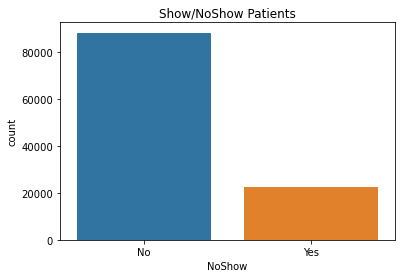

In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

- Based on the above visualization, No means Patients showed up and Yes means Patients did not show up, so it means that more patients showed up for their appointments than those that did not show up.

## What is the relationship between Gender and Noshow

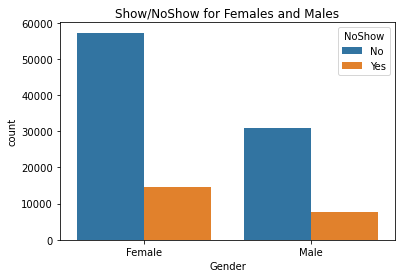

In [45]:
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
ax.set_xticklabels(['Female', 'Male'])
plt.show()

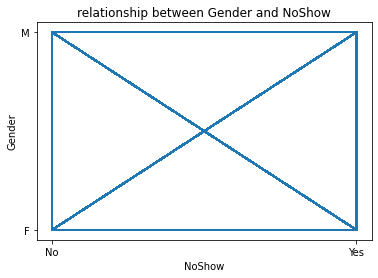

In [86]:
def noShowGender(x, y, ax=None, linewidth=1):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y,linewidth)
    ax.set_title('relationship between Gender and NoShow')
    ax.set_xlabel('NoShow')
    ax.set_ylabel('Gender')
    return (ax)

#plt.figure(figsize=(10,15))
noShowGender(df['NoShow'], df['Gender'])
plt.show()

The above visualization shows that 

- Based on the above visualization, it could be seen that there more females that showed up for their appointment and also there are more females that did not show up for their appointment.

# What is the relationship between Scholarship and Noshow

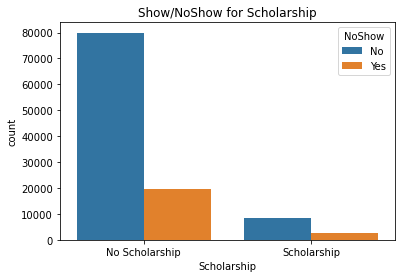

In [46]:
ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Scholarship")
ax.set_xticklabels(['No Scholarship', 'Scholarship'])
plt.show()

- Based on the above visualization, It could be seen people that did not have scholarship still showed up more for their appointments and also people with scholarship showed up more for their appointments.

## What is the relationship between Hypertension and Noshow?

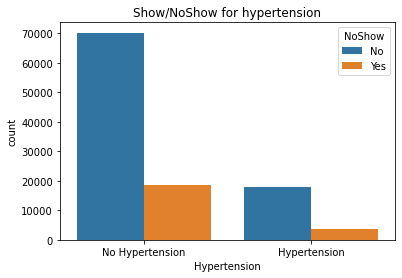

In [33]:
ax = sns.countplot(x=df.Hypertension, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for hypertension")
ax.set_xticklabels(['No Hypertension', 'Hypertension'])
plt.show()

- According to the above visualization, this is to show a relationship between patients that have or did not have hypertension and also, showed up or did not show up for their appointments, and it could be seen that more people still showed up for their appointments regardless of whether they have hypertension or not.

## What is the relationship between Diabetes and Noshow?

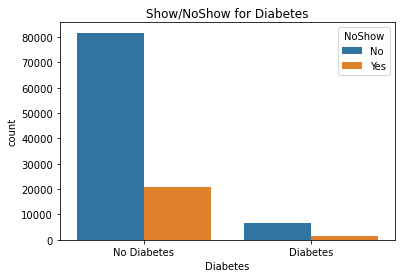

In [48]:
ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
ax.set_xticklabels(['No Diabetes', 'Diabetes'])
plt.show()

- According to the above visualization, this is to show a relationship between patients that have or did not have diabetes and also, showed up or did not show up for their appointments, and it could be seen that more people still showed up for their appointments regardless of whether they have diabetes or not.

## What is the relationship between Diabetes and Noshow?

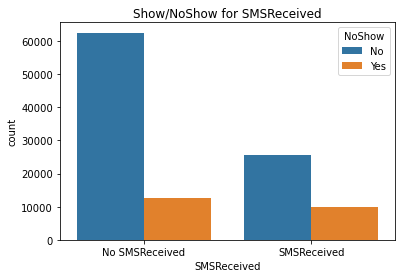

In [50]:
#this shows how SMSRecieved is distributed between patients that showed up and patients that did not show up.
ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
ax.set_xticklabels(['No SMSReceived', 'SMSReceived'])
plt.show()

- The above visualization show that more patients still showed up for their appointment regardless of whether they received SMS or not.

## What is the relationship between Handicap and Noshow?

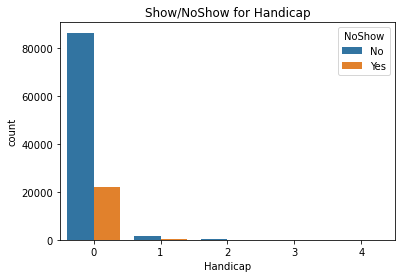

In [51]:
ax = sns.countplot(x=df.Handicap, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Handicap")
plt.show()

- This visualization between Handicap and Noshow showed that more handicap showed up for their appointment.

## How is Age distributed between Genders?

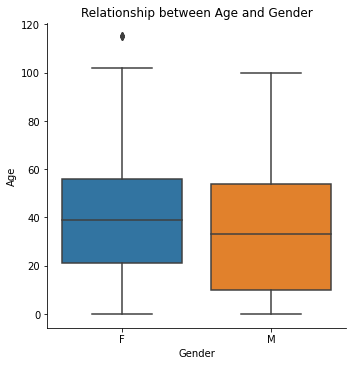

In [36]:
#this is a boxplot of Age distribution by Gender for the whole dataset
sns.catplot(x="Gender", y="Age", 
            data=df, kind="box")
plt.title("Relationship between Age and Gender")
plt.show()

- Observation made from the above visualization showed that Age was equally distributed between both Genders

## Who takes alcohol the most between Male and Female?

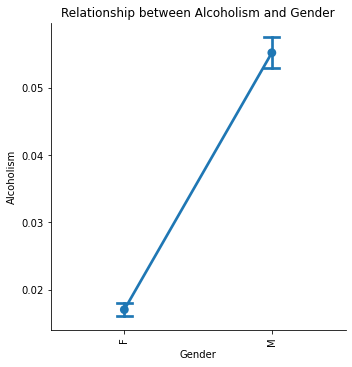

In [37]:
sns.catplot(x="Gender", 
            y="Alcoholism", 
            data=df, 
            kind="point",
            joint = 'False',
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)
plt.title("Relationship between Alcoholism and Gender")
# Show plot
plt.show()

- This visualization shows that the male gender are more involved in alcoholism than the Female Gender.

### Research Question - Which Neighbourhood has the hightest number of appointments? 

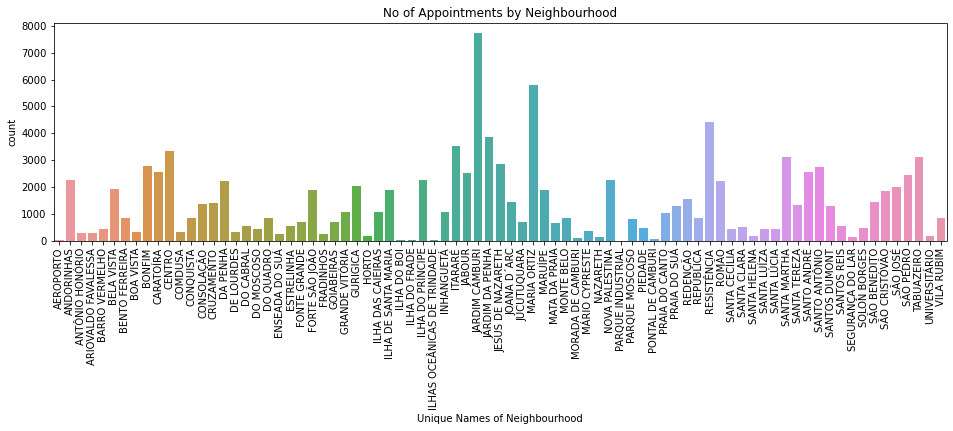

In [38]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
ax.set_xlabel("Unique Names of Neighbourhood")
plt.show()

In [55]:
counts = df.groupby(['NoShow', 'Scholarship']).count()
counts

PatientId  AppointmentID  Gender  ScheduledDay  \
NoShow Scholarship                                                   
No     0                79924          79924   79924         79924   
       1                 8283           8283    8283          8283   
Yes    0                19741          19741   19741         19741   
       1                 2578           2578    2578          2578   

                    AppointmentDay    Age  Neighbourhood  Hypertension  \
NoShow Scholarship                                                       
No     0                     79924  79924          79924         79924   
       1                      8283   8283           8283          8283   
Yes    0                     19741  19741          19741         19741   
       1                      2578   2578           2578          2578   

                    Diabetes  Alcoholism  Handicap  SMSReceived  
NoShow Scholarship                                               
No     0               79924       79924     79924        79924  
       1                8283        8283      8283         8283  
Yes    0               19741       19741     19741        19741  
       1                2578        2578      2578         2578

Text(0, 0.5, 'Count')

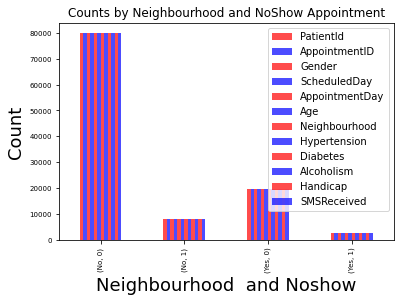

In [61]:
colors = ['red', 'blue']
counts.plot(kind='bar', title='Counts by Neighbourhood and NoShow Appointment', color=colors, alpha=.7, fontsize = 7);
plt.xlabel('Neighbourhood  and Noshow', fontsize=18)
plt.ylabel('Count', fontsize=18)

<Figure size 800x640 with 0 Axes>

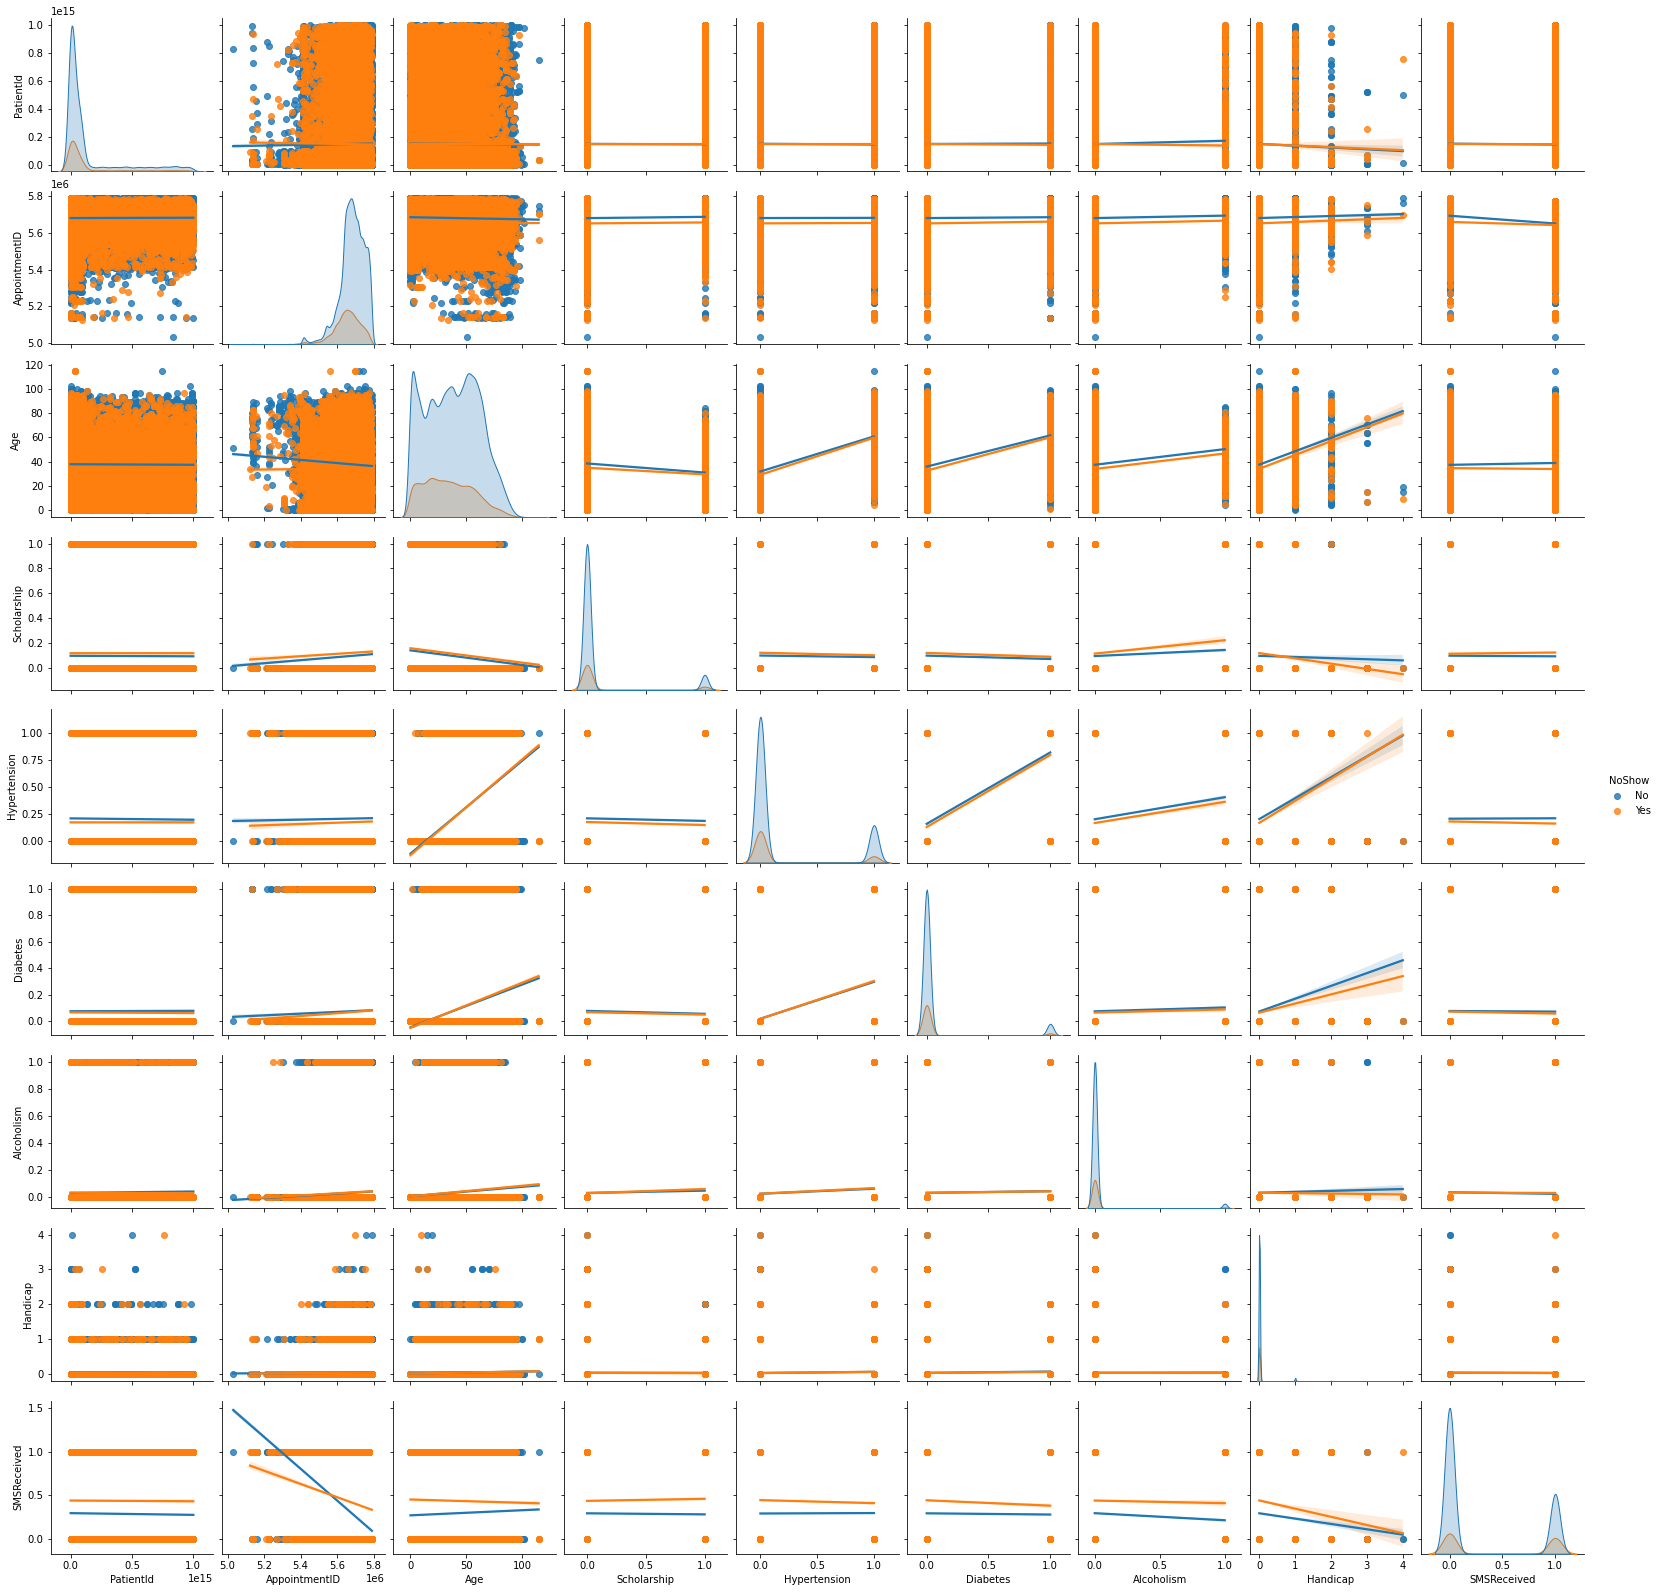

In [52]:
#this is a pairplot used to check if there is any correlation between the NoShow features and other features
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="NoShow")
plt.show()

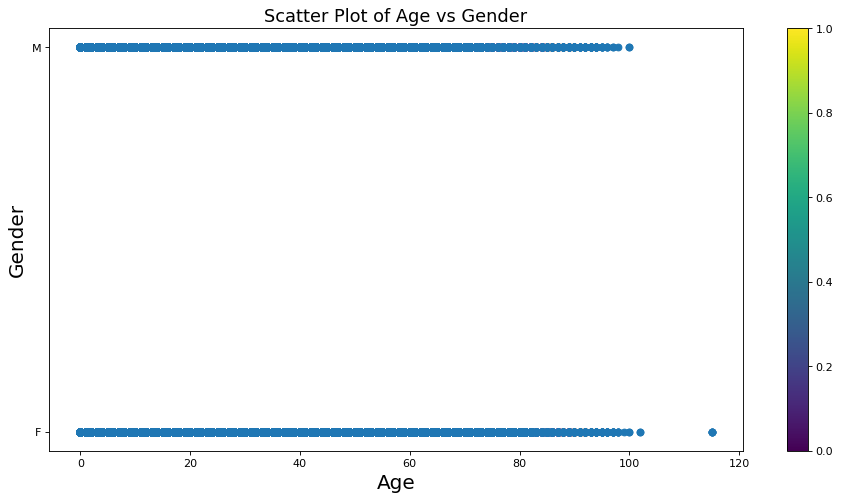

In [68]:
# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('Age', 'Gender', data=df)
plt.title("Scatter Plot of Age vs Gender", fontsize=16)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.colorbar()
plt.show() 

#####  Based on the above visualization,  It could be seen that Age and Gender are not mutually exclusive

# CONCLUSION
## Result:
#### The following observations were made from 
- Based on my analysis of the dataset, I was able to infer that More patients showed up for their appointments than those that did not show up.
- The unique values for ScheduledDay was 111 while The unique values for AppointmentDay was 27 which indicates that there are patients that scheduled date for their appointment but did not show up.
- Despite the fact that lesser people showed up for their appointment compare to those that scheduled date for it,   approximately 80% of patients showed up for their appointment while 20% did not show up for their appointment.
- More patients showed up at JARDIM CAMBURI Neighbourhood than any other Neighbourhood.
- 90% of patients did not get scholarship while only 10% got scholarship and despite that, more people still showed up for their  appointment.
## Limitations
#### There are a few limitations with our dataset:
- The Proximty of the Neighbourhood is not indicated to be able to determine if it was the reason people did not show up for their scheduled appointment
- There are a few patients Aged 0 which are included in the dataset, which I think they could have created another dataset for Age 0 to Age  17 so that proper adult age can start from Age 18 and a proper analysis could be made especially in the aspect of the different diseases put into consideration.
- There are alot of categorical variables present which made a bit challenging to find a correlation between them
